In [247]:
#import packages

import pandas as pd


In [248]:
#Read CSV files
df1= pd.read_csv('takehome_user_engagement_1.csv')
df2=pd.read_csv('takehome_users_2.csv',sep=',',encoding='latin-1')

In [249]:
#Display df2
df2.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [250]:
#Display df1
df1.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [251]:
# Display df2 info

df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [252]:
# Display df1 info

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [253]:
#Clean null values of df2

df2['last_session_creation_time'].fillna(df2['last_session_creation_time'].median(), inplace=True)
df2['invited_by_user_id'].fillna(df2['invited_by_user_id'].mode()[0], inplace=True)

In [254]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  12000 non-null  float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          12000 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [255]:
#Create new column date for df1
import datetime as dt
df1['date'] = pd.to_datetime(df1['time_stamp']).dt.date

In [256]:
#Remove duplicate entries for same date and id

df1 = df1.drop_duplicates(subset=['user_id', 'date'])

In [257]:
#Group the df by user_id
grouped_df = df1.groupby('user_id')
print(grouped_df)

In [258]:
#For each group check if there is 3 logins in a 7 day window and print the respective group IDs

d = []
for name, group in grouped_df:
  #for atleast 3 login only consider entries with more than 3 logins
    if len(group)>=3:
        dates = group.date.tolist()
        count=0
        flag = False
        number_of_days = 1
        for i in range(0,len(dates)-2):
            days= (dates[i+2]-dates[i]).days
            #print("date1:"+str(dates[i])+"-date2:"+str(dates[i+1])+"-date3:"+str(dates[i+2])+"="+str(days))
            if days<7 :
                count+=1
        d.append({"object_id":name,
                 "number_of_consecutive_login":count})

In [259]:
#create a dataframe with user id and number of logins
df3 = pd.DataFrame(d)
df3

,object_id,number_of_consecutive_login
0,2,2
1,10,255
2,20,1
3,33,1
4,42,323
...,...,...
2243,11975,191
2244,11980,0
2245,11981,0
2246,11988,20


In [260]:
#Left join with df2 to map all IDs and the number of login
df2=df2.merge(df3,on='object_id', how='left').set_index('object_id')

In [261]:
#Fill null values with 0 for consecutive login column
df2['number_of_consecutive_login'].fillna(0,inplace=True)

In [262]:
#mark users with more than 0 consecutive login as adopted user
df2['adopted_users'] = df2['number_of_consecutive_login'].apply(lambda x: 1 if x > 0 else 0)

In [263]:
df2.head(10)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,number_of_consecutive_login,adopted_users
object_id,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2.0,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,0
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0.0,0
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,10741.0,0.0,0
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,1.382888e+09,1,1,74,10741.0,0.0,0
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,1.382888e+09,0,0,302,10741.0,0.0,0


In [264]:
# Convert creation_time column to utc timetstamp
import pandas as pd
from datetime import datetime

# convert the creation_time column to datetime objects
df2['creation_time'] = pd.to_datetime(df2['creation_time'])

# create a new column with utc timestamps
df2['creation_time_timestamp'] = [datetime.timestamp(dt) for dt in df2['creation_time'].dt.to_pydatetime()]

# display the first 10 rows of the dataframe
df2.head(10)


,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,number_of_consecutive_login,adopted_users,creation_time_timestamp
object_id,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,0,1.398139e+09
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2.0,1,1.384487e+09
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,0,1.363735e+09
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,0,1.369124e+09
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,0,1.358418e+09
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0.0,0,1.387251e+09
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,10741.0,0.0,0,1.355664e+09
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,1.382888e+09,1,1,74,10741.0,0.0,0,1.375249e+09
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,1.382888e+09,0,0,302,10741.0,0.0,0,1.383624e+09


In [265]:
#find the inactive duration for each id
df2['inactive_duration'] = (pd.to_datetime('2014-05-30 23:59:19') - pd.to_datetime(df2['last_session_creation_time'], unit='s')).dt.days
df2.head()


,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,number_of_consecutive_login,adopted_users,creation_time_timestamp,inactive_duration
object_id,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,0,1.398139e+09,38
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2.0,1,1.384487e+09,60
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,0,1.363735e+09,437
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,0,1.369124e+09,373
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,0,1.358418e+09,493


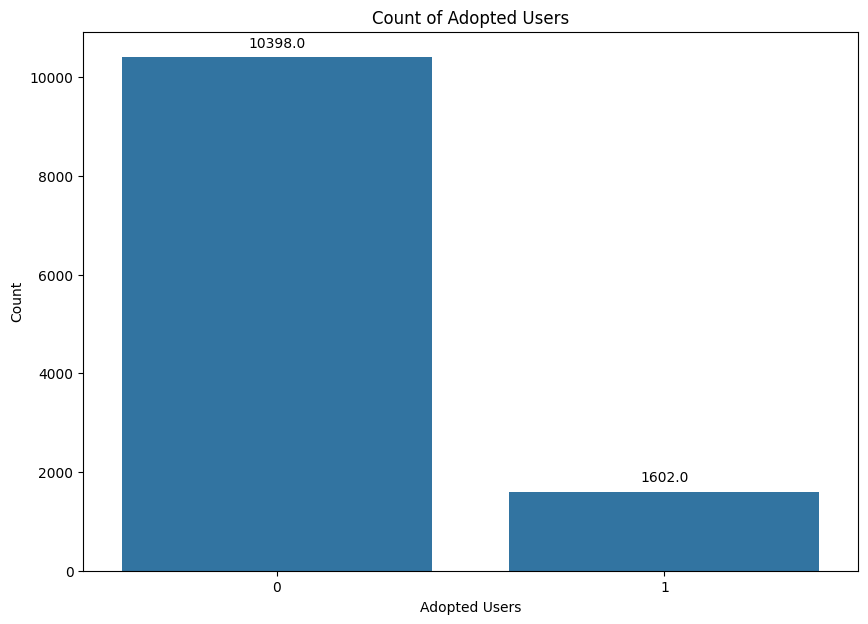

In [266]:
#Adopted to non-adopted ratio
import seaborn as sns
import matplotlib.pyplot as plt


# Create a Seaborn count plot
plt.figure(figsize=(10, 7))
ax = sns.countplot(x='adopted_users', data=df2)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.title('Count of Adopted Users')
plt.xlabel('Adopted Users')
plt.ylabel('Count')
plt.show()

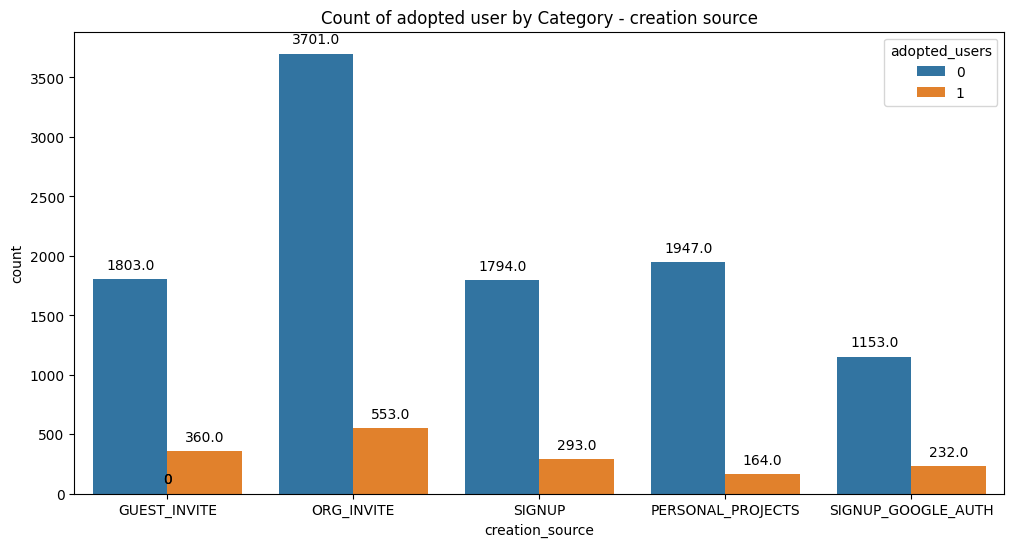

In [267]:
#Adopted to non Adopted plot based on creation source
plt.figure(figsize=(12, 6))
ax= sns.countplot(x='creation_source', hue='adopted_users', data=df2)
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title('Count of adopted user by Category - creation source')
plt.show()

In [268]:
#Adopted to non adopted percentage based on invite type
adopted_users = df2[df2['adopted_users'] == 1]
non_adopted_users = df2[df2['adopted_users'] == 0]

creation_source_counts = df2.groupby('creation_source').size()

adopted_by_source = adopted_users.groupby('creation_source').size()
non_adopted_by_source = non_adopted_users.groupby('creation_source').size()

adopted_percentage = (adopted_by_source / creation_source_counts) * 100
non_adopted_percentage = (non_adopted_by_source / creation_source_counts) * 100

print("Percentage of adopted users by creation source:")
print(adopted_percentage)

print("\nPercentage of non-adopted users by creation source:")
print(non_adopted_percentage)


Percentage of adopted users by creation source:
creation_source
GUEST_INVITE          16.643551
ORG_INVITE            12.999530
PERSONAL_PROJECTS      7.768830
SIGNUP                14.039291
SIGNUP_GOOGLE_AUTH    16.750903
dtype: float64

Percentage of non-adopted users by creation source:
creation_source
GUEST_INVITE          83.356449
ORG_INVITE            87.000470
PERSONAL_PROJECTS     92.231170
SIGNUP                85.960709
SIGNUP_GOOGLE_AUTH    83.249097
dtype: float64


In [269]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn import tree
from sklearn.tree import plot_tree


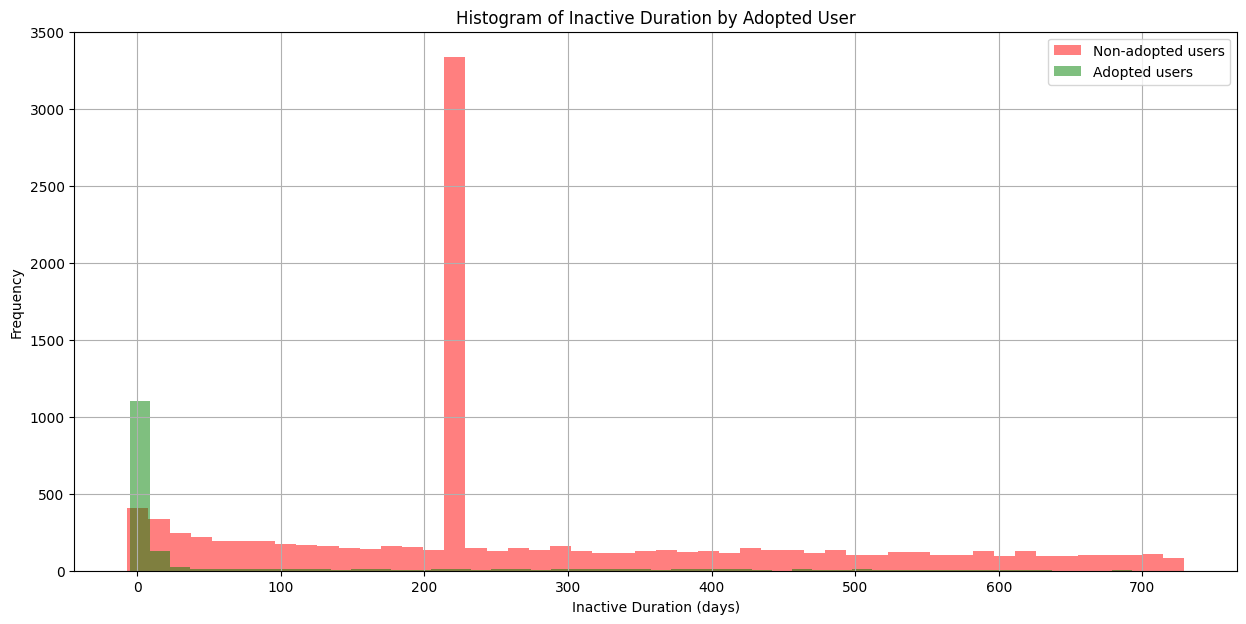

In [270]:
#check inactive duration distribution by category
import matplotlib.pyplot as plt

# Create a histogram with color based on adopted_users
plt.figure(figsize=(15, 7))
df2[df2['adopted_users'] == 0]['inactive_duration'].hist(bins=50, alpha=0.5, color='red', label='Non-adopted users')
df2[df2['adopted_users'] == 1]['inactive_duration'].hist(bins=50, alpha=0.5, color='green', label='Adopted users')
plt.xlabel('Inactive Duration (days)')
plt.ylabel('Frequency')
plt.title('Histogram of Inactive Duration by Adopted User')
plt.legend()
plt.show()


**From here we can see most for the adopted users doesnot have an inactive duration of more than 10-15 days**


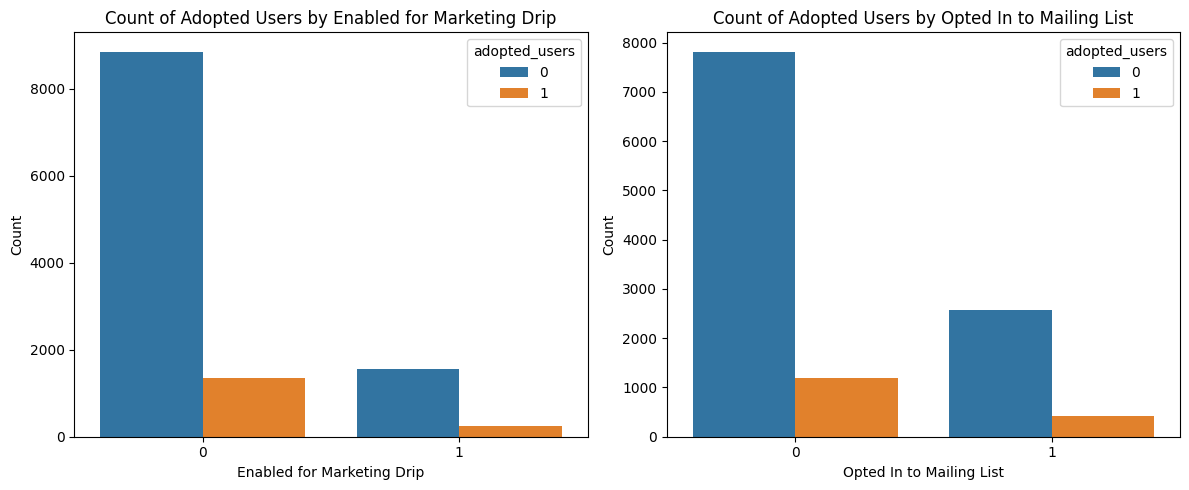

In [271]:


# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first countplot on the first subplot
sns.countplot(x='enabled_for_marketing_drip', hue='adopted_users', data=df2, ax=axes[0])
axes[0].set_title('Count of Adopted Users by Enabled for Marketing Drip')
axes[0].set_xlabel('Enabled for Marketing Drip')
axes[0].set_ylabel('Count')

# Plot the second countplot on the second subplot
sns.countplot(x='opted_in_to_mailing_list', hue='adopted_users', data=df2, ax=axes[1])
axes[1].set_title('Count of Adopted Users by Opted In to Mailing List')
axes[1].set_xlabel('Opted In to Mailing List')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


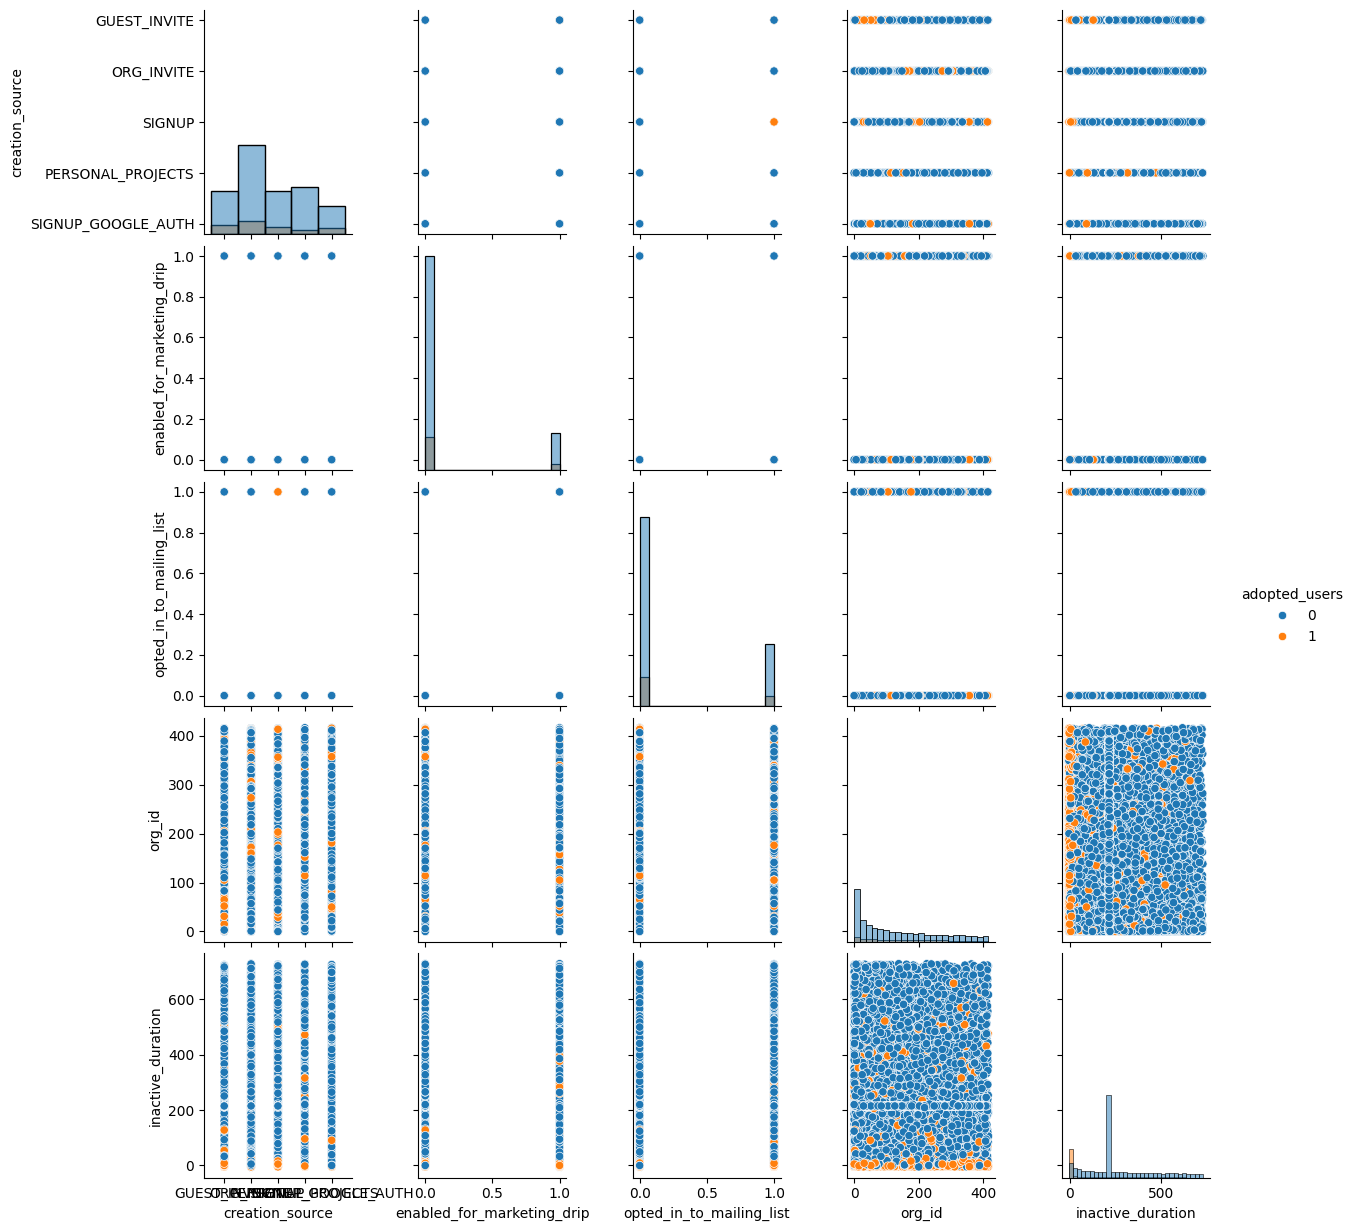

In [272]:
#pairplot
sns.pairplot(df2, vars=['creation_source','enabled_for_marketing_drip','opted_in_to_mailing_list','org_id','inactive_duration'], hue='adopted_users', diag_kind='hist')
plt.show()


<Axes: >

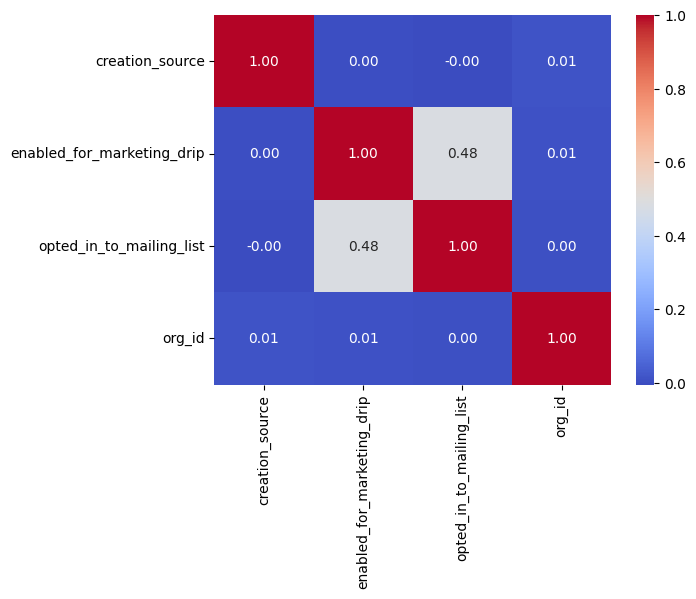

In [273]:
#Label encoding for creation source
encoder = LabelEncoder()
df2['creation_source'] = encoder.fit_transform(df2['creation_source'])
#Check ranked correlation between the values
sns.heatmap(df2[['creation_source','enabled_for_marketing_drip','opted_in_to_mailing_list','org_id',]].corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,f1_score

scaler = StandardScaler()



X= df2.drop(['number_of_consecutive_login','creation_time', 'name', 'email','creation_time_timestamp','last_session_creation_time'], axis=1)
#X[['last_session_creation_time']]=scaler.fit_transform(X[['last_session_creation_time']])
X= pd.get_dummies(X,columns=['creation_source', 'org_id'])


In [285]:
X.columns

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'invited_by_user_id', 'adopted_users', 'inactive_duration',
       'creation_source_0', 'creation_source_1', 'creation_source_2',
       'creation_source_3', 'creation_source_4',
       ...
       'org_id_407', 'org_id_408', 'org_id_409', 'org_id_410', 'org_id_411',
       'org_id_412', 'org_id_413', 'org_id_414', 'org_id_415', 'org_id_416'],
      dtype='object', length=427)

In [286]:
# Split data into features (X) and target variable (y)


X = X.drop('adopted_users', axis=1)
y = df2['adopted_users']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [295]:
clf = tree.DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9166666666666666
F1-Score: 0.6610169491525424

Confusion Matrix:
 [[2005   69]
 [ 131  195]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      2074
           1       0.74      0.60      0.66       326

    accuracy                           0.92      2400
   macro avg       0.84      0.78      0.81      2400
weighted avg       0.91      0.92      0.91      2400



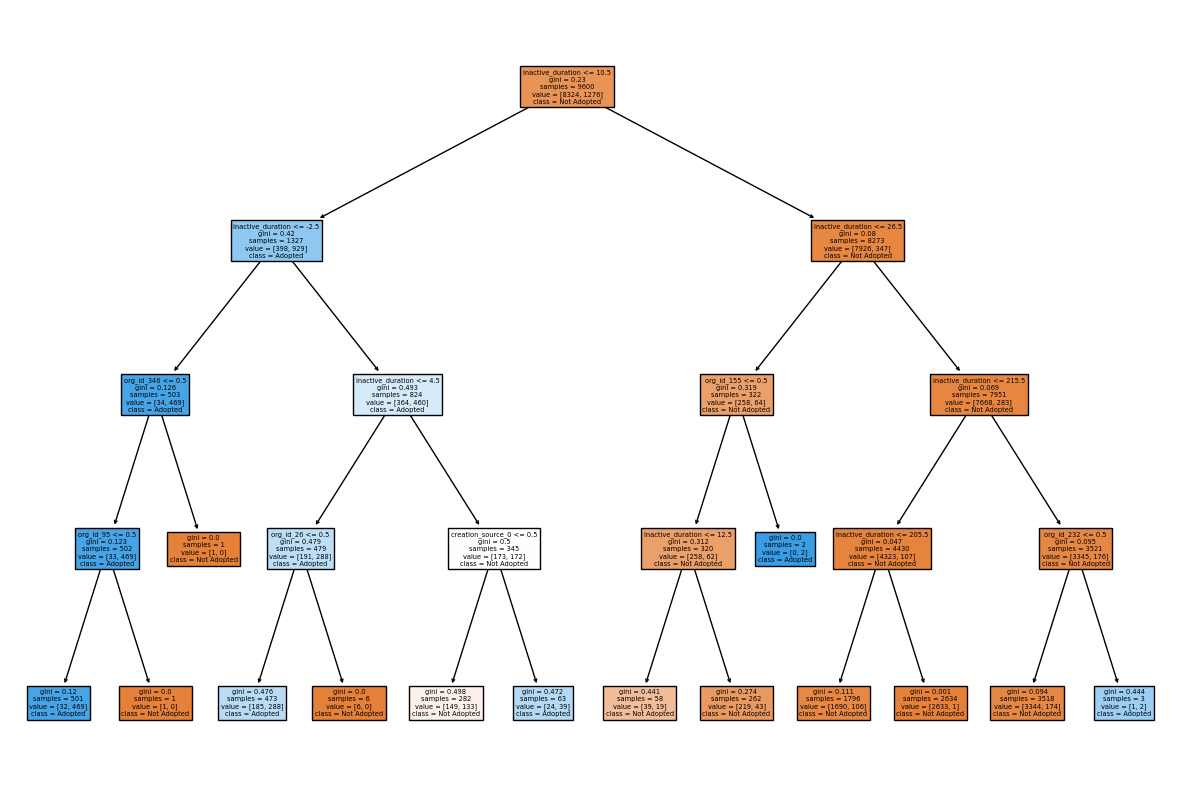

In [297]:
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=['Not Adopted', 'Adopted'], filled=True)
plt.savefig('decision_tree_plot.png')
plt.show()

**After training the decision tree we can observe that our custom feature inactive duration is playing a pivotal role as it is the root node in predicting adopted or non adopted user .**


**Summary of Data Exploration:**

- We explored two datasets: one containing user engagement data and the other containing user information.
- We cleaned the data by handling null values and creating new features.
- We identified users who logged in at least three times within a seven-day window as adopted users.
- We analyzed the relationship between various features and user adoption.
- We visualized the data using different plots, including countplots, histograms, and a pairplot.
- We encoded categorical features for further analysis.
- We trained a decision tree model to predict user adoption based on various features.
- The decision tree analysis revealed that the "inactive_duration" feature is the most important factor in predicting user adoption.

**Key Findings:**

- Adopted users tend to have a shorter inactive duration compared to non-adopted users.
- There is a higher proportion of adopted users among users who are enabled for marketing drip and opted in to the mailing list.
- The creation source and organization ID also play a role in user adoption.

**Further Analysis:**

- We can explore other machine learning models to improve the accuracy of user adoption prediction.
- We can segment the data and build separate models for different user groups.
- We can collect additional data and conduct further analysis to gain deeper insights into the factors influencing user adoption.